# Contour Overlay 

## Imports 
* _numpy_ for array math
* _astropy.io_ for reading and writing FITS cubes and images
* _matplotlib.pyplot_ for plotting spectra and images.

In [1]:
from astropy.io import fits
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## Read in data cube
Read in NIRSpec IFU data cube from Box.   This particular example is a simulated quasar + host galaxy.

In [2]:
BoxPath='https://data.science.stsci.edu/redirect/JWST/jwst-data_analysis_tools/cube_fitting/Q3D_20200407/'
fname='Q3D_NRS_491_s3d.fits'
filename=BoxPath+fname
hdul1=fits.open(filename)
hdul1.info()

with fits.open(filename, memmap=False) as hdulist:
    sci = hdulist["SCI"].data


Filename: /Users/javerbukh/.astropy/cache/download/py3/c8280408aa82d1c95e0fe27f5f82f3d6
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     296   ()      
  1  SCI           1 ImageHDU        63   (46, 48, 3915)   float32   
  2  ERR           1 ImageHDU        12   (46, 48, 3915)   float32   
  3  DQ            1 ImageHDU        12   (46, 48, 3915)   int32 (rescales to uint32)   
  4  WMAP          1 ImageHDU        10   (46, 48, 3915)   float32   
  5  ASDF          1 BinTableHDU     11   1R x 1C   [9911B]   


## Sum over spectral axis

This could be any derivative data product of the same shape as the spatial dimensions of the cube (emission line flux, equivalent width, velocity map, etc...). Here we are doing one of the simplest operations - a sum, for illustrative purposes

In [3]:
cube_sum=np.sum(sci, axis=0)

## Generate contours
User-specified contour levels in specified units. Custom colors are important, but could be added at a later stage if technically complicated.  Logarithmic and linear spacing options to auto-generate contours would be nice.

In [4]:
min_level=np.min(cube_sum)
max_level=np.max(cube_sum)
level_colors=['blue', 'purple','red', 'magenta']
contour_levels=[max_level/10000., max_level/1000., max_level/100., max_level/10.]

## Display image and overlay contours

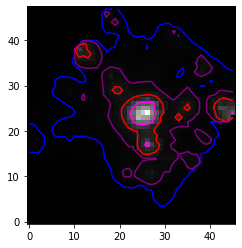

In [5]:
ax = plt.subplots()[1]

#Image normalization
norm = ImageNormalize(stretch=SqrtStretch())

#Display image
image = ax.imshow(cube_sum, cmap='gray', origin='lower', norm=norm)

#Overlay contours
contour = ax.contour(cube_sum, levels=contour_levels, colors=level_colors)


In [6]:
contour_levels

[736.72665, 7367.2665, 73672.665, 736726.65]

In [8]:
from jdaviz.app import Application
from glue.core import Data
app = Application(configuration='cubeviz')
data = app.load_data(filename)
app

Application(components={'g-viewer-tab': '<template>\n  <component :is="stack.container">\n    <g-viewer-tab\n …

/Users/javerbukh/anaconda3/envs/jdaviz-dev-5/lib/python3.7/site-packages/glue/viewers/common/viewer.py:186: UserWarning: Add large data set?
  warnings.warn(message)
/Users/javerbukh/anaconda3/envs/jdaviz-dev-5/lib/python3.7/site-packages/glue/viewers/common/viewer.py:186: UserWarning: Add large data set?
  warnings.warn(message)
/Users/javerbukh/anaconda3/envs/jdaviz-dev-5/lib/python3.7/site-packages/glue/core/data.py:1803: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  full_result[result_slices] = result


AttributeError: 'dict' object has no attribute 'spectral_axis'

In [9]:
app.load_data("/Users/javerbukh/Documents/manga-7495-12704-LOGCUBE_fixed.fits")

/Users/javerbukh/anaconda3/envs/jdaviz-dev-5/lib/python3.7/site-packages/glue/viewers/common/viewer.py:186: UserWarning: Add large data set?
  warnings.warn(message)
/Users/javerbukh/anaconda3/envs/jdaviz-dev-5/lib/python3.7/site-packages/glue/viewers/common/viewer.py:186: UserWarning: Add large data set?
  warnings.warn(message)
/Users/javerbukh/anaconda3/envs/jdaviz-dev-5/lib/python3.7/site-packages/glue/viewers/common/viewer.py:186: UserWarning: Add large data set?
  warnings.warn(message)
ERROR:root:Data should be 3- or 4-dimensional
ERROR:root:Data should be 3- or 4-dimensional
ERROR:root:Data should be 3- or 4-dimensional
ERROR:root:Could not determine format - use the `format=` parameter to explicitly set the format
ERROR:root:Data should be 3- or 4-dimensional
ERROR:root:Data should be 3- or 4-dimensional
ERROR:root:Data should be 3- or 4-dimensional
ERROR:root:Data should be 3- or 4-dimensional
ERROR:root:Data should be 3- or 4-dimensional
ERROR:root:Data should be 3- or 4-dim

In [24]:
figure_flux = app.get_viewer("flux-viewer")
figure_flux.layers

(BqplotImageLayerArtist for manga-7495-12704-LOGCUBE_fixed.fits[FLUX],)

In [18]:
from bqplot import Figure, LinearScale, Axis, ColorScale
from bqplot_image_gl import ImageGL, Contour

In [ ]:
x, y = np.ogrid[-np.pi:np.pi:1000j, -np.pi:np.pi:1000j]
values = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))

In [ ]:
contour_level = 0.95

import skimage.measure

contours = skimage.measure.find_contours(values.T, contour_level)
contours = [k/values.T.shape for k in contours]

In [11]:
scale_x = LinearScale(min=0, max=1)
scale_y = LinearScale(min=0, max=1)
scales = {'x': scale_x, 'y': scale_y}
axis_x = Axis(scale=scale_x, label='x')
axis_y = Axis(scale=scale_y, label='y', orientation='vertical')
scales_image = {'x': scale_x, 'y': scale_y, 'image': ColorScale(min=np.min(cube_sum).item(), max=np.max(cube_sum).item())}
print(np.min(cube_sum).item(), np.max(cube_sum).item())

figure = Figure(scales=scales, axes=[axis_x, axis_y])
image = ImageGL(image=cube_sum, scales=scales_image)
# contour_precomputed = Contour(contour_lines=[contours], level=contour_level, scales=scales_image, label_steps=200)
contour = Contour(image=image, level=contour_levels, scales=scales_image, color="orange")

figure.marks = (image, contour)
figure

-225.119140625 7367266.5


Figure(axes=[Axis(label='x', scale=LinearScale(max=1.0, min=0.0)), Axis(label='y', orientation='vertical', sca…

In [35]:
contour.level

[736.72665, 7367.2665, 73672.665, 736726.65]

In [34]:
figure_flux.marks = (image,contour)

In [23]:
figure_flux

Figure(axes=[Axis(grid_lines='none', label='Pixel Axis 2 [x] deg', scale=LinearScale(allow_padding=False, max=…